# SCRUB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as scs
plt.style.use('seaborn')

In [2]:
data = pd.read_csv('kc_house_data.csv')
pd.set_option('display.max_columns', 999)

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

Before seeing what insights can be made from the data, the data should be cleaned to remove/change NaNs, see what columns/outliers might be removed, if bins can be created to create date/price ranges...

# Duplicates, NaN

In [3]:
#Take a wider look at the data
data.head(50)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


waterfront, view, yr_renovated have a lot of zeroes, sqft_basement has a ? value and some NaN can be observed.

In [4]:
#Check shape
data.shape

(21597, 21)

In [5]:
#Create value for ids in the dataframe so we can check for duplicates
ids = data['id']

In [6]:
duplicates = pd.concat(g for _, g in data.groupby('id') if len(g) > 1)

In [7]:
duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,0.0,3,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,3,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,0.0,0.0,3,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,0.0,3,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
11421,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,0.0,0.0,4,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6340,9828200460,1/6/2015,430000.0,2,1.00,700,4800,1.0,0.0,0.0,3,7,700,0.0,1922,0.0,98122,47.6147,-122.300,1440,4800
15185,9834200305,7/16/2014,350000.0,3,1.00,1790,3876,1.5,0.0,0.0,5,7,1090,?,1904,0.0,98144,47.5750,-122.288,1360,4080
15186,9834200305,2/10/2015,615000.0,3,1.00,1790,3876,1.5,0.0,0.0,5,7,1090,700.0,1904,0.0,98144,47.5750,-122.288,1360,4080
1084,9834200885,7/17/2014,360000.0,4,2.50,2080,4080,1.0,0.0,0.0,5,7,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080


Multiple of the same house occurs each time the house was sold. Going to keep it's most recent sale date and price.

In [8]:
df = data.copy()

In [9]:
df = df.sort_values('price').drop_duplicates(subset=['id'], keep='last')

In [10]:
df.shape

(21420, 21)

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,19065.000000,21357.000000,21420.000000,21420.000000,21420.000000,21420.000000,17610.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418660e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007658,0.234677,3.410784,7.662792,1791.170215,1971.092997,83.875809,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.675586e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.087177,0.766459,0.650035,1.171971,828.692965,29.387141,400.501849,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [13]:
#Check for na values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2355
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3810
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Let's take a look at the value counts for the columns with missing data.

In [14]:
df.waterfront.value_counts(normalize=True)

0.0    0.992342
1.0    0.007658
Name: waterfront, dtype: float64

In [15]:
df.view.value_counts(normalize=True)

0.0    0.901484
2.0    0.044763
3.0    0.023646
1.0    0.015405
4.0    0.014702
Name: view, dtype: float64

There are already many zeroes in these columns so it seems reasonable to make the assumption that the NaNs are likely zeroes as well. I will replace the NaNs with zeroes.

In [16]:
df.waterfront.fillna(0, inplace=True)
df.view.fillna(0, inplace=True)

In [17]:
#Next, the NaN values for yr_renovated need to be explored
df.yr_renovated.value_counts(normalize=True)

0.0       0.957978
2014.0    0.004145
2003.0    0.001760
2013.0    0.001760
2007.0    0.001704
            ...   
1934.0    0.000057
1948.0    0.000057
1976.0    0.000057
1971.0    0.000057
1951.0    0.000057
Name: yr_renovated, Length: 70, dtype: float64

I will make the assumption that if NaN is listed, the house was not renovated. I will, therefore, be changing these values to 0 so that the data can be more easily manipulated.

In [18]:
#Fill in the NaN values with 0
df.yr_renovated.fillna(0, inplace=True)
df.yr_renovated.value_counts(normalize=True)

0.0       0.965453
2014.0    0.003408
2003.0    0.001447
2013.0    0.001447
2007.0    0.001401
            ...   
1934.0    0.000047
1948.0    0.000047
1976.0    0.000047
1971.0    0.000047
1951.0    0.000047
Name: yr_renovated, Length: 70, dtype: float64

A question mark is located in the sqft_basement, let's get rid of all question marks in the dataframe by replacing them with zeroes.

In [19]:
#Replace all ? with 0 and change sqft_basement to int (this column keeps giving me float/string errors)
df.replace(to_replace=['?'], value=0,inplace=True)
df.sqft_basement = pd.to_numeric(df.sqft_basement)

In [20]:
#Make sure all visible NaNs have been taken care with
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Check data to see how changes look on the whole

In [21]:
df.shape

(21420, 21)

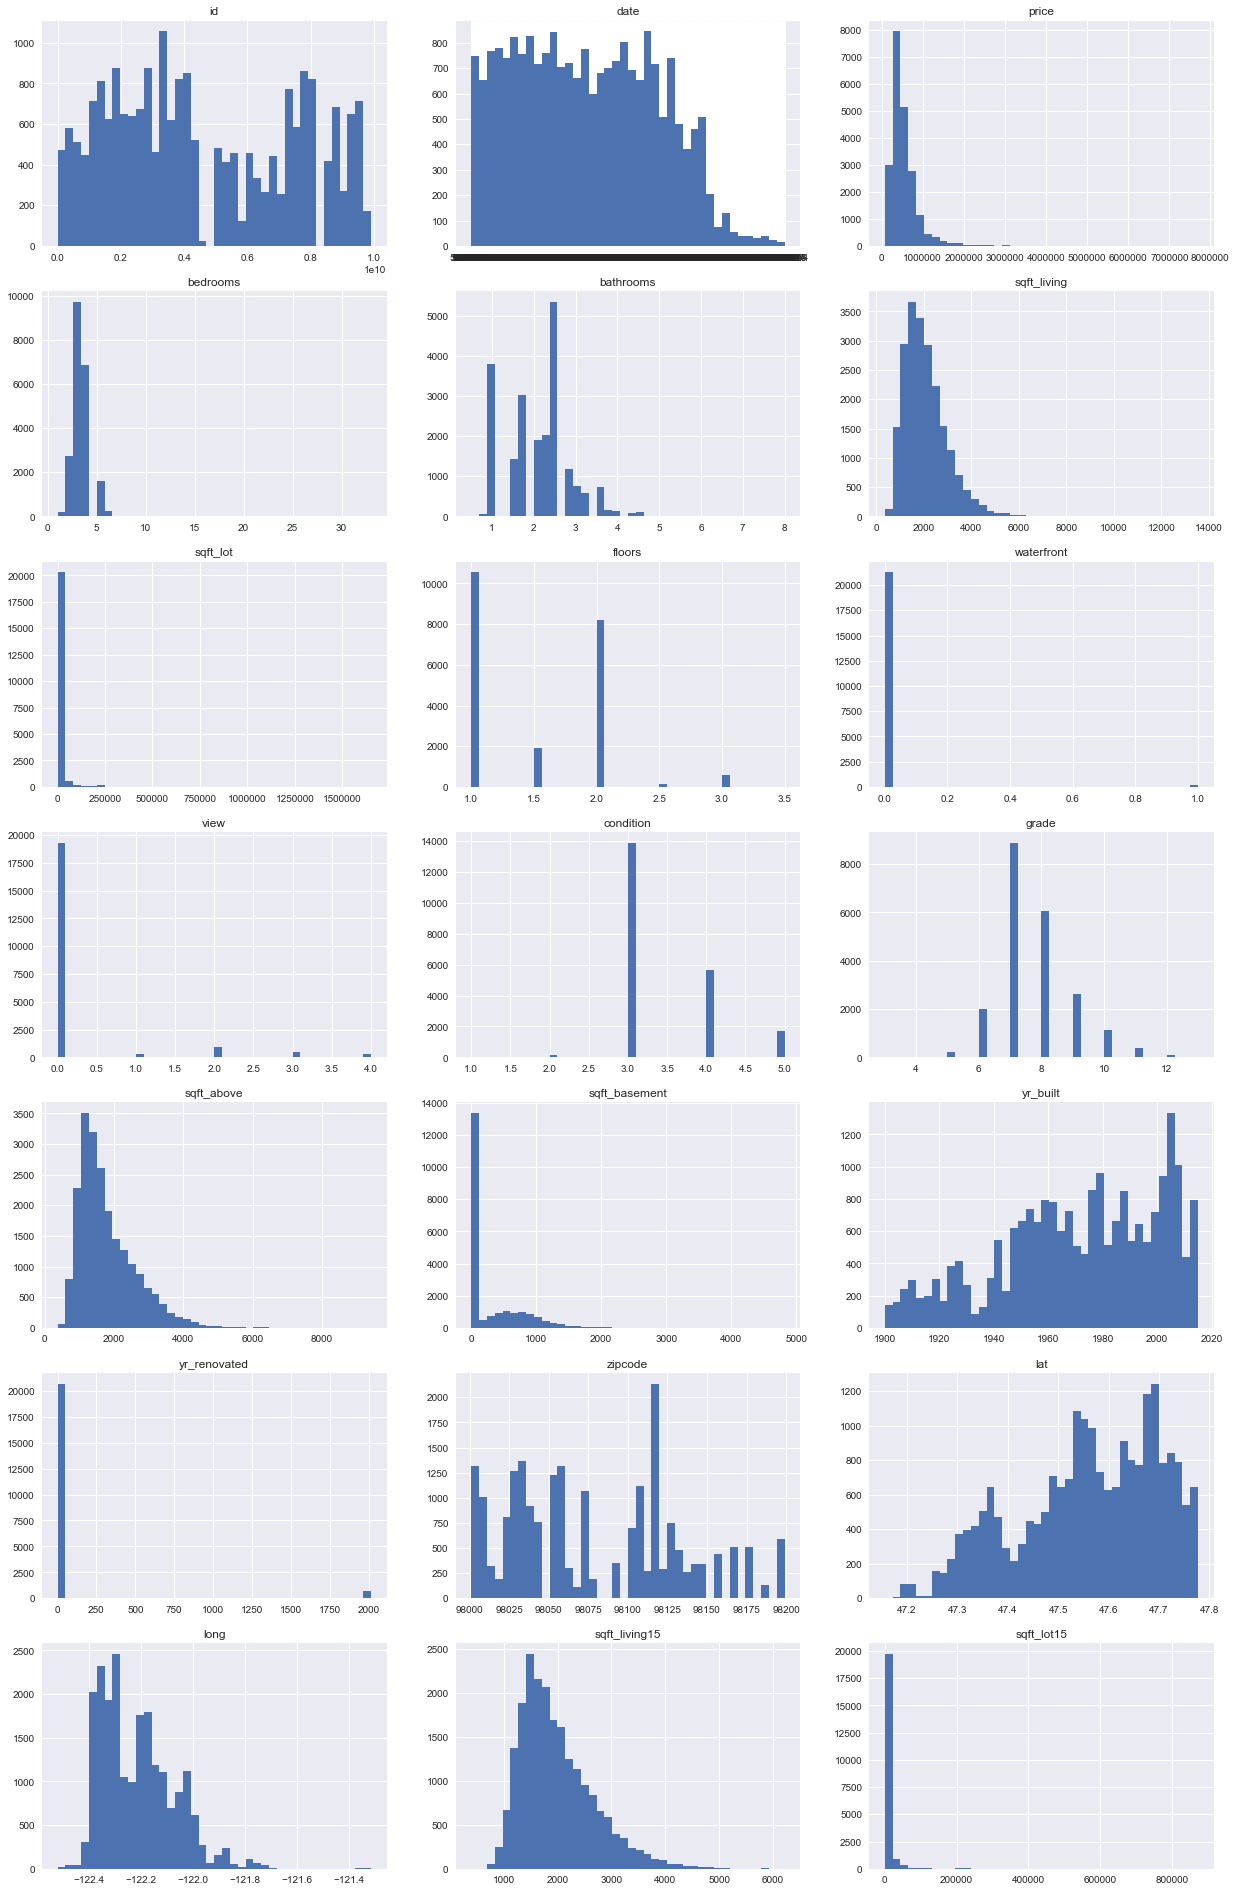

In [22]:
fig, axs = plt.subplots(7,3, figsize=(21,34))

for index, ax in enumerate(axs.flatten()):
    if index < 21:
        column = df.columns[index]
        ax.hist(df[column], bins=40)
        ax.set_title(column)
plt.show()

# Saving Cleaned Data

In [23]:
df.to_csv("../scrubbed_kc_house_data.csv")